In [1]:
import soundfile as sf

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
#data, samplerate = sf.read('existing_file.wav')

In [1]:
import torch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
torch.cuda.is_available()

False

In [6]:
test_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Final Project/Data/DS_10283_2791/Test"
input_path = os.path.join(test_data_path, "noisy_testset_wav")
output_path = os.path.join(test_data_path, "clean_testset_wav")

In [13]:
wavs = []
wavs.extend(glob.glob(os.path.join(output_path, "**/*.wav"), recursive=True))
wavs.extend(glob.glob(os.path.join(output_path, "**/*.flac"), recursive=True))
wavs.extend(glob.glob(os.path.join(output_path, "**/*.pcm"), recursive=True))

In [15]:
 train_noises = [signal.replace("clean", "noisy") for signal in wavs]

In [131]:
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Final Project/Data/DS_10283_2791/Train"
input_path = os.path.join(train_data_path, "noisy_trainset_28spk_wav")
output_path = os.path.join(train_data_path, "clean_trainset_28spk_wav")

In [132]:
# List all the images names
audio_list = os.listdir(input_path)

list_audios_in = []
list_audios_out = []

list_sr_in = []
list_sr_out = []

shapes_dim_in = []
shapes_dim_out = []

shape_in = []
shape_out = []
#for aud_name in audio_list:
for aud_name in tqdm(audio_list, total=len(audio_list)):
    #print(aud_name)
    # build the path for the audios
    aud_input_path = os.path.join(input_path, aud_name)
    aud_output_path = os.path.join(output_path, aud_name)
    #aud_output_path = os.path.join(output_path, "p232_002.wav")
    
    # Open the audios
    audio_in, sr_in = sf.read(aud_input_path, dtype="float32")
    audio_out, sr_out = sf.read(aud_output_path, dtype="float32")
    
    in_s = audio_in.shape
    ou_s = audio_out.shape
    
    shapes_dim_in.append(len(in_s))
    shapes_dim_out.append(len(ou_s))
    
    shape_in.append(in_s[-1])
    shape_out.append(ou_s[-1])
    
    
    list_audios_in.append(audio_in)
    list_audios_out.append(audio_out)
    list_sr_in.append(sr_in)
    list_sr_out.append(sr_out)

list_sr_in = np.array(list_sr_in)    
list_sr_out = np.array(list_sr_out)   

shapes_dim_in = np.array(shapes_dim_in)    
shapes_dim_out = np.array(shapes_dim_out)  

shape_in = np.array(shape_in)
shape_out = np.array(shape_out)

100%|██████████| 11572/11572 [31:44<00:00,  6.08it/s] 


In [133]:
print("Noise audio SR: ", np.unique(list_sr_in))
print("De-Noise audio SR: ", np.unique(list_sr_out))

print("Noise audio Mono-Dual: ", np.unique(shapes_dim_in))
print("De-Noise audio Mono-Dual: ", np.unique(shapes_dim_out))

Noise audio SR:  [48000]
De-Noise audio SR:  [48000]
Noise audio Mono-Dual:  [1]
De-Noise audio Mono-Dual:  [1]


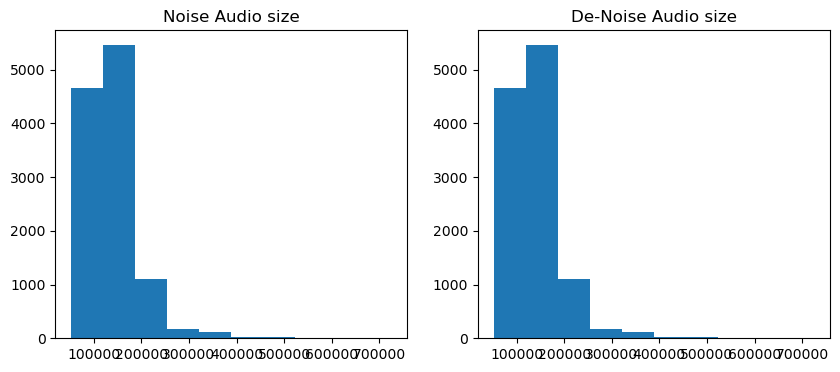

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
ax1.hist(shape_in)
ax1.title.set_text("Noise Audio size")

ax2.hist(shape_out)
ax2.title.set_text("De-Noise Audio size")

plt.show()

# Open File and plot it

In [2]:
import os
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Final Project/Data/DS_10283_2791/Train"
input_path = os.path.join(train_data_path, "noisy_trainset_28spk_wav")
audio_path = os.path.join(input_path, "p226_001.wav")

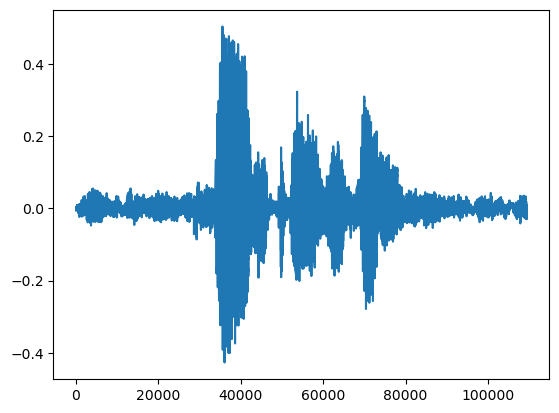

In [13]:
import wave
import matplotlib.pyplot as plt
import numpy as np

# Open the audio file
with wave.open(audio_path, 'r') as f:
    # Read the audio data
    data = f.readframes(-1)
    #data = np.fromstring(data, 'Int16')
    # convert the samples to a numpy array and normalize the values
    data = np.frombuffer(data, dtype=np.int16) / 2**15
    
    
# Plot the audio data
plt.plot(data)
#plt.axis("off")
plt.show()

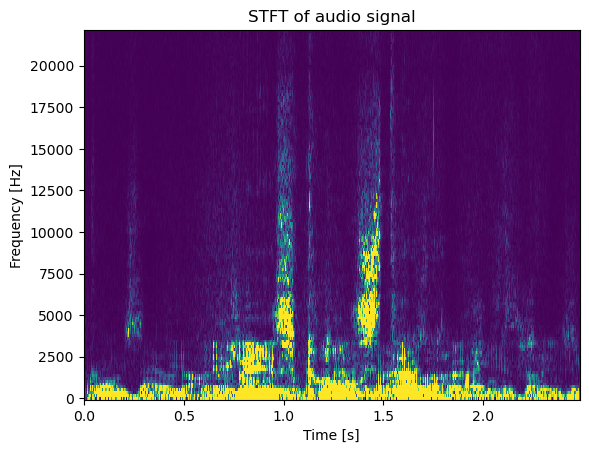

In [28]:
from scipy.signal import stft

cmap = plt.colormaps['ocean'] #PiYG


# Compute the STFT of the audio data
f, t, Zxx = stft(data, fs=44100)

# Plot the STFT results
plt.pcolormesh(t, f, np.abs(Zxx)*40, vmin=0, vmax=np.amax(np.abs(Zxx)))#, cmap=cmap
plt.title('STFT of audio signal')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()